In [1]:
import kwant
import kwant.continuum
import numpy as np
import sympy
import matplotlib.pyplot as plt
from sympy import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy
import warnings
import tkwant
import matplotlib
from matplotlib import rc
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
def plotHam(inv = 0, deltaH = 0):
    
    '''
    Function: 
    Discretizing the 2D Hamiltonian with the structural inversion symmetry term, hybridization, and zeeman splitting term
    
    Variables:
        inv = Inversion Symmetry Term
        invconj = Conjugate of inv
        negInvConj = Conjugate of negative inv
        
        h = Planck's Constant
        v_f = Fermi Velocity
        deltaH = hybridization term, conjH = conjugate of hybridization term
        g = g-factor
        mu = Bohr Magneton
    '''
    rc('text', usetex=True)

    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 

    inv = inv
    invconj = conjugate(inv)
    negInvConj = conjugate(-inv)
    
    h = scipy.constants.hbar / (scipy.constants.e) * 10**(9)
    print(h)
    deltaH = deltaH
    conjH = conjugate(deltaH)
    v_f = 8.8 * 10**(5)
    
    g = 4.5 # <= 5
    mu = scipy.constants.e * scipy.constants.hbar / (2 * scipy.constants.electron_mass) * 10**22
    print(mu)
    # Represents the Dirac Hamiltonian as a Sympy Expression
    hamiltonian = '''
                    h * v_f * Matrix(BlockMatrix([ [ sigma_x * k_y - k_x * sigma_y , zeros(2)], [zeros(2), -1 * (sigma_x * k_y - k_x * sigma_y)] ])) 
                    + Matrix([[inv, 0,0,0] , [0, inv, 0 , 0 ] , [ 0, 0, -inv, 0] , [0 , 0 , 0, -inv]] )
                    + Matrix([[0, 0,deltaH,0] , [0,0  ,0 , deltaH] , [ deltaH, 0, 0, 0] , [0, deltaH ,0, 0]] )
                    + Matrix(BlockMatrix( [ [g * mu * B * sigma_z, zeros(2)], [zeros(2), g * mu * B * sigma_z]])) 
                    '''
    display(kwant.continuum.sympify(hamiltonian))
    syst = kwant.continuum.discretize_landau(hamiltonian, N=5)
    
    syst = syst.finalized()   
    
    params = dict(v_f = v_f, h =h, inv = inv, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu)
    b_values = np.linspace(0, 2, 200)
    
    axes = []
    fig, axes = plt.subplots(nrows = 2,ncols = 4, figsize = (12,6), dpi = 300)
    
    
    axes[0,0].annotate('(a)',
            xy=(.03, .965), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20, fontweight = 'bold')
    axes[0,0].set_title(r"$\Delta i = 0$" , fontsize = 18)
    axes[0,0].set_xlabel("B [T]", fontsize = 18)
    axes[0,0].set_ylabel("E [eV]", fontsize = 18)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[0,0], params=params, show=False)
    
    
    params2 = dict(v_f = v_f, h =h, inv = 0.05, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu)

    axes[0,1].set_title(r"$\Delta i = 0.05$", fontsize = 18)
    axes[0,1].set_xlabel("B [T]", fontsize = 18)
    #axes[0,1].set_ylabel("E [eV]", fontsize = 24)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[0,1], params=params2, show=False)    
    
    
    params3 = dict(v_f = v_f, h =h, inv = 0.1, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu)

    axes[0,2].set_title(r"$\Delta i = 0.10$", fontsize = 18)
    axes[0,2].set_xlabel("B [T]", fontsize = 18)
   # axes[0,2].set_ylabel("E [eV]", fontsize = 24)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[0,2], params=params3, show=False)
    
    params4 = dict(v_f = v_f, h =h, inv = 0.15, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu)

    axes[0,3].set_title(r"$\Delta i = 0.15$", fontsize = 18)
    axes[0,3].set_xlabel("B [T]", fontsize = 18)
    #axes[0,3].set_ylabel("E [eV]", fontsize = 24)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[0,3], params=params4, show=False)

    
    
    params = dict(v_f = v_f, h =h, inv = inv, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu, B = 0)
    
    axes[1,0].annotate('(b)',
            xy=(.03, .45), xycoords='figure fraction',
            horizontalalignment='left',
            fontsize=20, fontweight = 'bold')
    axes[1,0].set_title(r"$\Delta i = 0, \Delta h = 0.25$", fontsize = 18)
    axes[1,0].set_xlabel("B [T]", fontsize = 18)
    axes[1,0].set_ylabel("E [eV]", fontsize = 18)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[1,0], params=params, show=False)
    
    
    params2 = dict(v_f = v_f, h =h, inv = 0.05, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu)

    axes[1,1].set_title(r"$\Delta i = 0.05, \Delta h = 0.25$", fontsize = 18)
    axes[1,1].set_xlabel("B [T]", fontsize = 18)
    #axes[1,1].set_ylabel("E [eV]", fontsize = 24)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[1,1], params=params2, show=False)    
    
    
    params3 = dict(v_f = v_f, h =h, inv = 0.10, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu)

    axes[1,2].set_title(r"$\Delta i = 0.10, \Delta h = 0.25$", fontsize = 18)
    axes[1,2].set_xlabel("B [T]", fontsize = 18)
    #axes[0,2].set_ylabel("E [eV]", fontsize = 24)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[1,2], params=params3, show=False)
    
    params4 = dict(v_f = v_f, h =h, inv = 0.15, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu)

    axes[1,3].set_title(r"$\Delta i = 0.15, \Delta h = 0.25$", fontsize = 18)
    axes[1,3].set_xlabel("B [T]", fontsize = 18)
    #axes[0,3].set_ylabel("E [eV]", fontsize = 24)
    kwant.plotter.spectrum(syst, ('B', b_values), ax = axes[1,3], params=params4, show=False)
    
    
    
    
    fig.tight_layout()

6.582119569509067e-07
0.09274010078362163


Matrix([
[        B*g*mu + inv, h*v_f*(I*k_x + k_y),                deltaH,                    0],
[h*v_f*(-I*k_x + k_y),       -B*g*mu + inv,                     0,               deltaH],
[              deltaH,                   0,          B*g*mu - inv, -h*v_f*(I*k_x + k_y)],
[                   0,              deltaH, -h*v_f*(-I*k_x + k_y),        -B*g*mu - inv]])

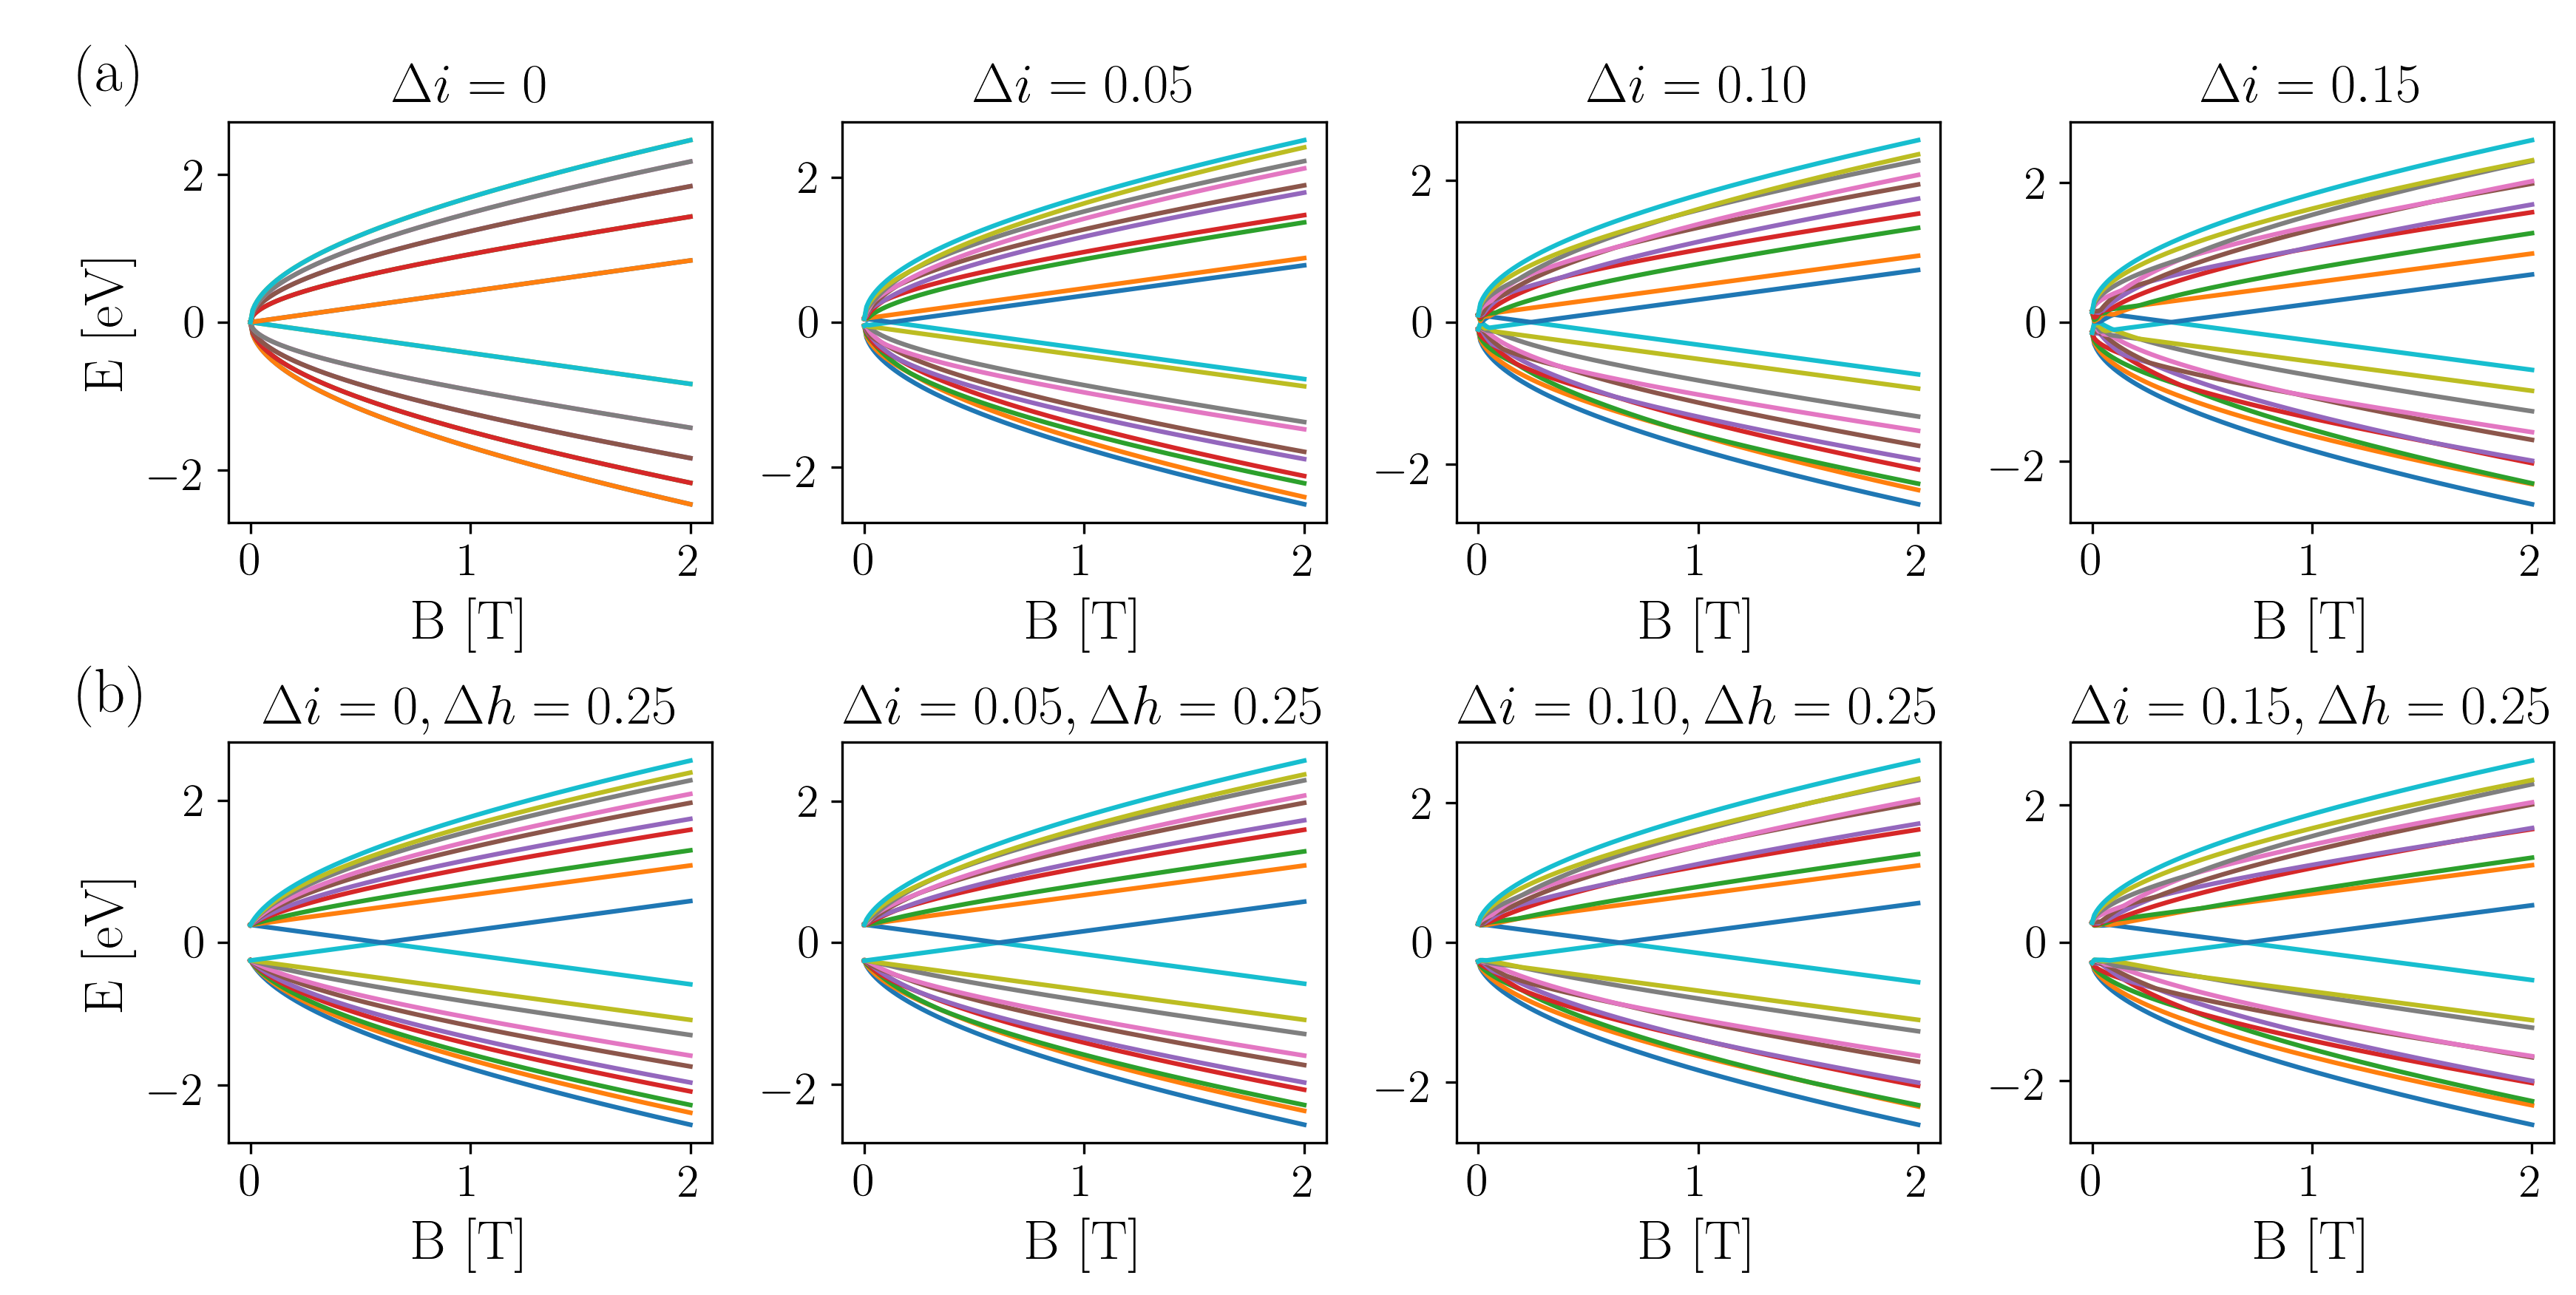

In [39]:
plotHam()

In [44]:
def plotHam2(inv = 0, deltaH = 0):
    
    '''
    Function: 
    Discretizing the 2D Hamiltonian with the structural inversion symmetry term, hybridization, and zeeman splitting term
    
    Variables:
        inv = Inversion Symmetry Term
        invconj = Conjugate of inv
        negInvConj = Conjugate of negative inv
        
        h = Planck's Constant
        v_f = Fermi Velocity
        deltaH = hybridization term, conjH = conjugate of hybridization term
        g = g-factor
        mu = Bohr Magneton
    '''
    rc('text', usetex=True)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
    matplotlib.rcParams['mathtext.fontset'] = 'cm'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    inv = inv
    invconj = conjugate(inv)
    negInvConj = conjugate(-inv)
    
    h = scipy.constants.hbar / (scipy.constants.e) * 10**(9)
    deltaH = deltaH
    conjH = conjugate(deltaH)
    v_f = 8.8 * 10**(5)
    
    g = 4.5 # <= 5
    mu = scipy.constants.e * scipy.constants.hbar / (2 * scipy.constants.electron_mass) * 10**22
    # Represents the Dirac Hamiltonian as a Sympy Expression
    hamiltonian = '''
                    h * v_f * Matrix(BlockMatrix([ [ sigma_x * k_y - k_x * sigma_y , zeros(2)], [zeros(2), -1 * (sigma_x * k_y - k_x * sigma_y)] ])) 
                    + Matrix([[inv, 0,0,0] , [0, inv, 0 , 0 ] , [ 0, 0, -inv, 0] , [0 , 0 , 0, -inv]] )
                    + Matrix([[0, 0,deltaH,0] , [0,0  ,0 , deltaH] , [ deltaH, 0, 0, 0] , [0, deltaH ,0, 0]] )
                    + Matrix(BlockMatrix( [ [g * mu * B * sigma_z, zeros(2)], [zeros(2), g * mu * B * sigma_z]]))
                    '''
    #display(kwant.continuum.sympify(hamiltonian))
    
    params = dict(v_f = v_f, h =h, inv = inv, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu, B = 0)
    b_values = np.linspace(0, 2, 200)
    
    axes = []
    fig, axes = plt.subplots(nrows = 2,ncols = 4, figsize = (12,6), dpi = 300)
    
    
    
    a = 0.45
    template = kwant.continuum.discretize(hamiltonian, grid=a)
    L, W = 2,2
    
    def shape(site):
        (x, y) = site.pos
        return (0 <= y < W and 0 <= x < L)

    def lead_shape(site):
        (x, y) = site.pos
        return (0 <= y < W)

    syst = kwant.Builder()
    syst.fill(template, shape, (0, 0))

    lead = kwant.Builder(kwant.TranslationalSymmetry([-a, 0]))
    lead.fill(template, lead_shape, (0, 0))

    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    
    syst.eradicate_dangling()
    syst = syst.finalized()
    
    #axes[1,0].set_title(r"$\Delta i = 0$")
    axes[0,0].annotate('(a)',
        xy=(.03, .965), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top',
        fontsize=20, fontweight = 'bold')
    axes[0,0].set_title(r"$\Delta i = 0$" , fontsize = 18)
    axes[0,0].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    axes[0,0].set_ylabel("E [eV]", fontsize = 18)
    axes[0,0].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params, ax = axes[0,0],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)
    
    
    params2 = dict(v_f = v_f, h =h, inv = 0.05, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu, B = 0)

    #axes[1,1].set_title(r"$\Delta i = 5$")
    axes[0,1].set_title(r"$\Delta i = 0.05$" , fontsize = 18)
    axes[0,1].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    #axes[1,1].set_ylabel("E [eV]", fontsize = 24)
    axes[0,1].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params2, ax = axes[0,1],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)    
    
    params3 = dict(v_f = v_f, h =h, inv = 0.10, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu, B=0)

    #axes[1,2].set_title(r"$\Delta i = 10$")
    axes[0,2].set_title(r"$\Delta i = 0.10$" , fontsize = 18)
    axes[0,2].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    #axes[1,2].set_ylabel("E [eV]", fontsize = 24)
    axes[0,2].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params3, ax = axes[0,2],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)
    
    params4 = dict(v_f = v_f, h =h, inv = 0.15, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = deltaH, g =g , mu = mu, B = 0)
    
    axes[0,3].set_title(r"$\Delta i = 0.15$" , fontsize = 18)
    axes[0,3].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    #axes[1,3].set_ylabel("E [eV]", fontsize = 24)
    axes[0,3].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params4, ax = axes[0,3],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)
    
    params = dict(v_f = v_f, h =h, inv = inv, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu, B = 0)
    
    axes[1,0].annotate('(b)',
        xy=(.03, .45), xycoords='figure fraction',
        horizontalalignment='left',
        fontsize=20, fontweight = 'bold')
    #axes[1,0].set_title(r"$\Delta i = 0$")
    axes[1,0].set_title(r"$\Delta i = 0, \Delta h = 0.25$" , fontsize = 18)
    axes[1,0].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    axes[1,0].set_ylabel("E [eV]", fontsize = 18)
    axes[1,0].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params, ax = axes[1,0],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)
    
    
    params2 = dict(v_f = v_f, h =h, inv = 0.05, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu, B = 0)

    #axes[1,1].set_title(r"$\Delta i = 5$")
    axes[1,1].set_title(r"$\Delta i = 0.05, \Delta h = 0.25$" , fontsize = 18)
    axes[1,1].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    #axes[1,1].set_ylabel("E [eV]", fontsize = 24)
    axes[1,1].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params2, ax = axes[1,1],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)    
    
    params3 = dict(v_f = v_f, h =h, inv = 0.10, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu, B=0)

    #axes[1,2].set_title(r"$\Delta i = 10$")
    axes[1,2].set_title(r"$\Delta i = 0.10, \Delta h = 0.25$" , fontsize = 18)
    axes[1,2].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    #axes[1,2].set_ylabel("E [eV]", fontsize = 24)
    axes[1,2].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params3, ax = axes[1,2],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)
    
    params4 = dict(v_f = v_f, h =h, inv = 0.15, invconj = invconj, negInvConj = negInvConj,conjH = conjH, deltaH = 0.25, g =g , mu = mu, B = 0)
    axes[1,3].set_title(r"$\Delta i = 0.15, \Delta h = 0.25$" , fontsize = 18)
    axes[1,3].set_xlabel(r"$k_x [\AA^{-1}]$", fontsize = 18)
    #axes[1,3].set_ylabel("E [eV]", fontsize = 24)
    axes[1,3].set_xlim(-.5,.5)
    kwant.plotter.bands(syst.leads[0], params=params4, ax = axes[1,3],
                   momenta=np.linspace(-0.5, 0.5, 201), show=False)    
    
    
    fig.tight_layout()

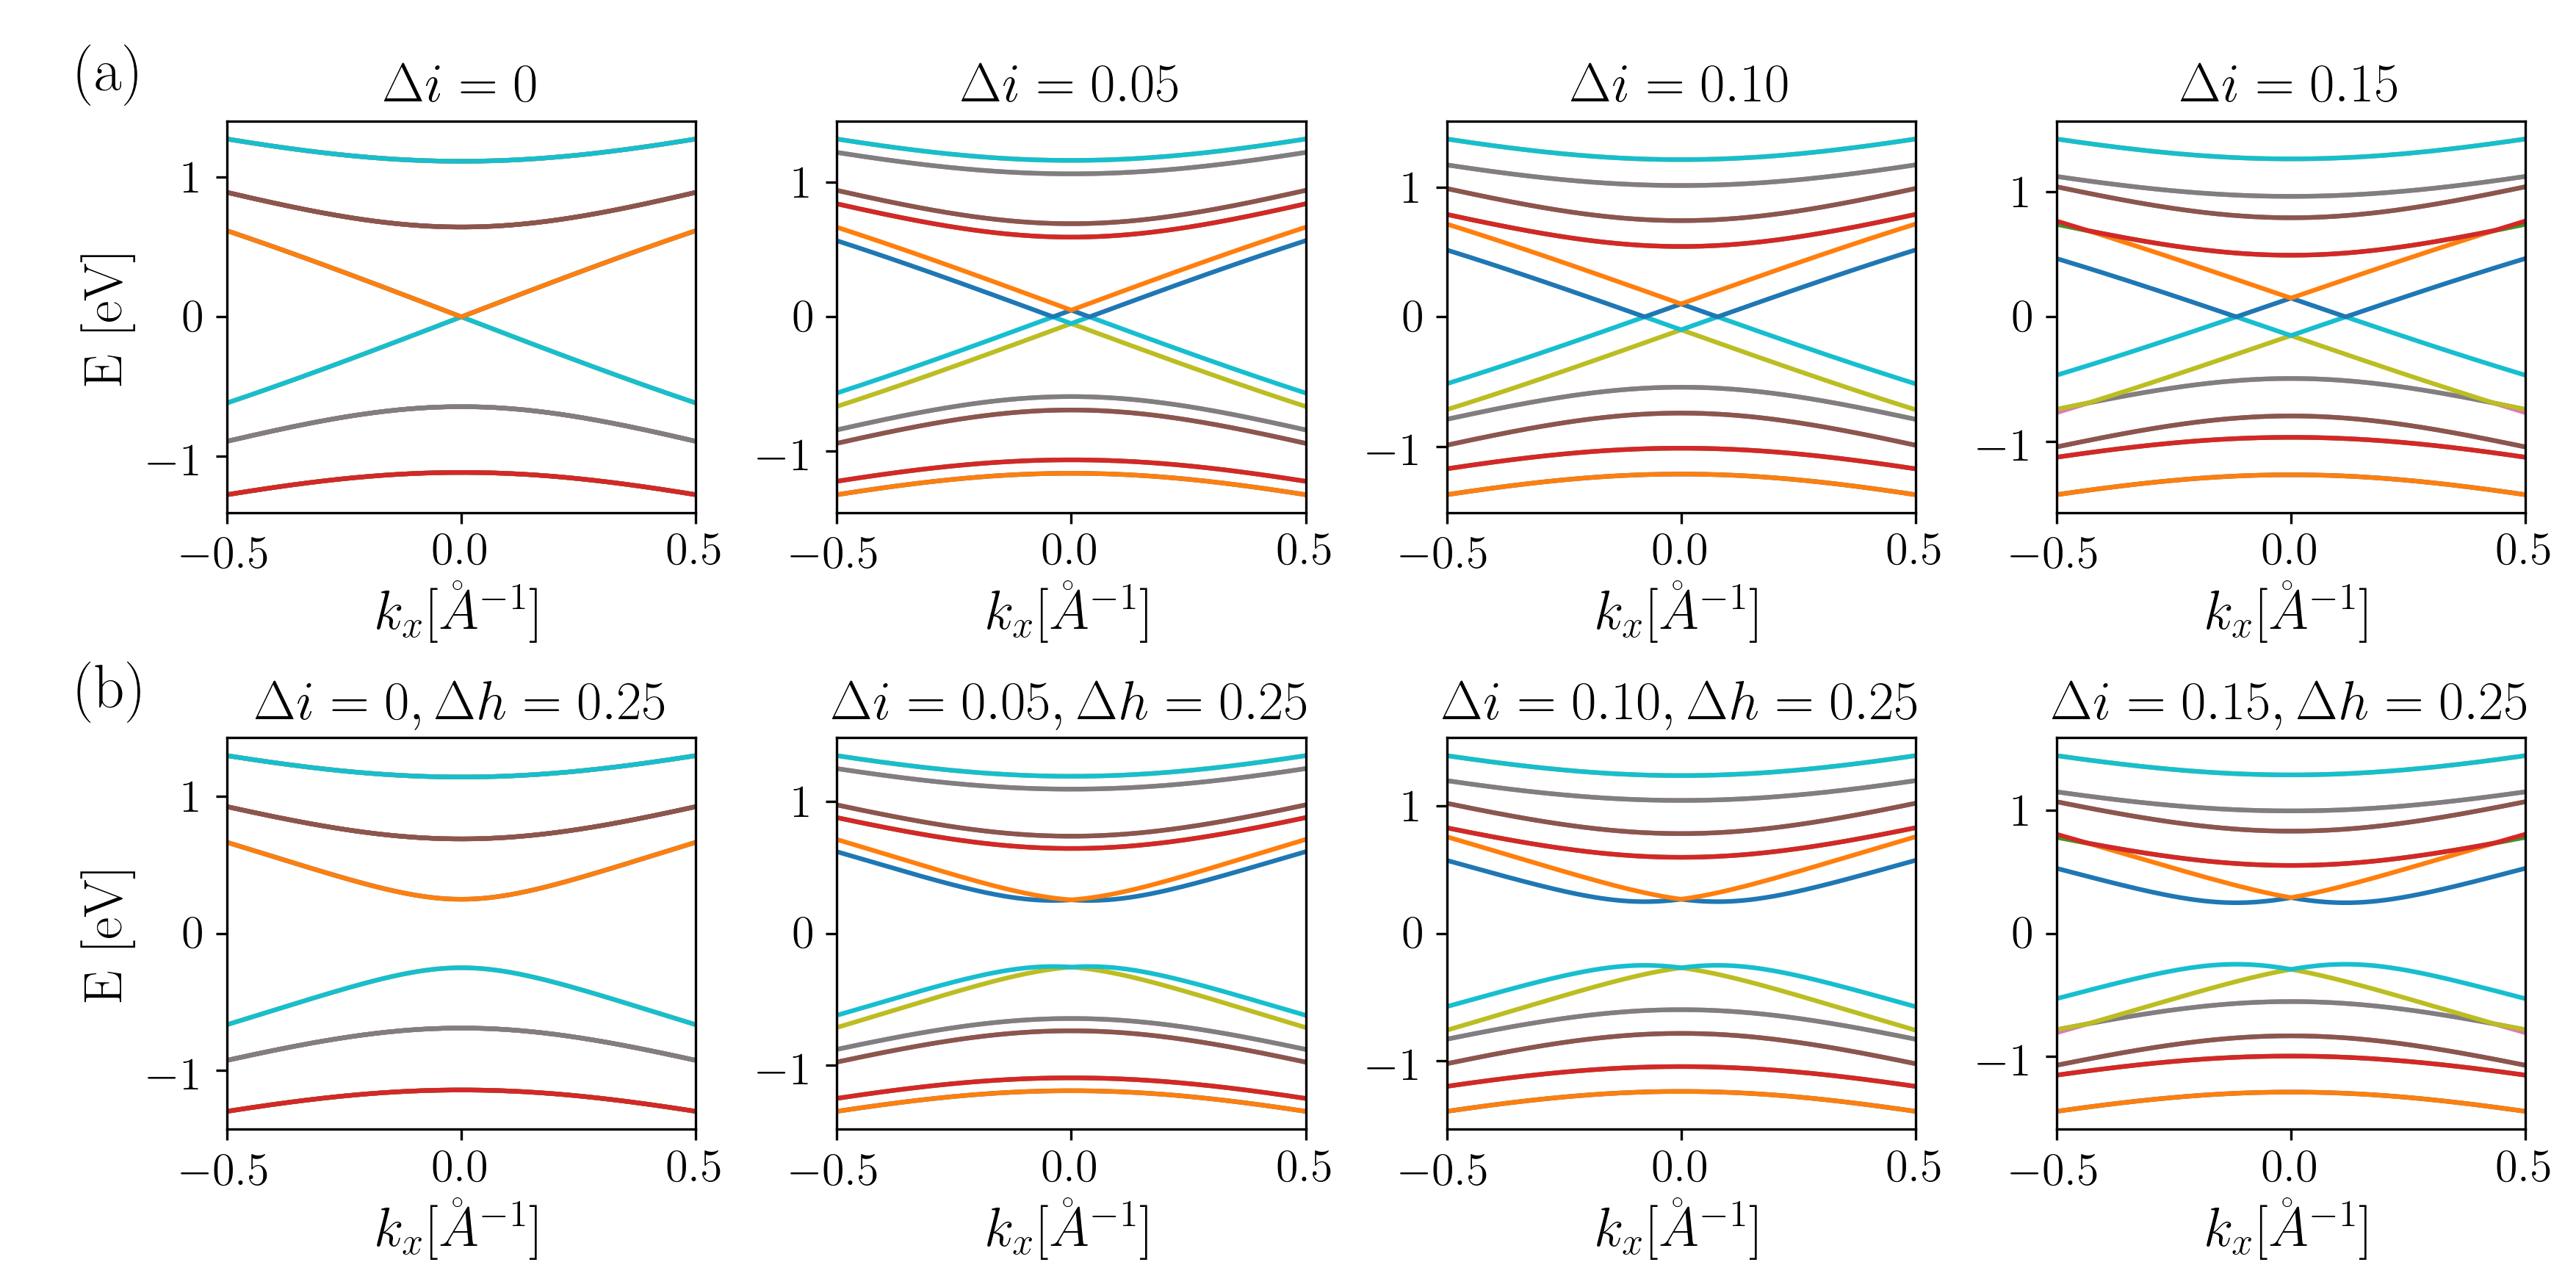

In [45]:
plotHam2()